In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Building_Energy_Efficiency.csv")
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.7638,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.9800,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.9800,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.9800,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.9000,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [4]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.763885,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105490,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.820000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
df.isnull().value_counts()

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  Orientation  Glazing Area  Glazing Area Distribution  Heating Load  Cooling Load
False                 False         False      False      False           False        False         False                      False         False           768
Name: count, dtype: int64

In [9]:
df.shape

(768, 10)

## 1. Thermal Demand Profiles
- Which buildings require more heating vs cooling?

- Are there buildings where heating load is much higher than cooling (cold-climate bias)?

- Identify buildings with balanced vs imbalanced loads.

#### Determine which buildings need more heating vs cooling

In [10]:
df['Thermal_Dominance'] = df.apply(
    lambda row: 'Heating-Dominant' if row['Heating Load'] > row['Cooling Load']
    else 'Cooling-Dominant' if row['Cooling Load'] > row['Heating Load']
    else 'Balanced',
    axis=1
)

# Count of each type
df['Thermal_Dominance'].value_counts()

Thermal_Dominance
Cooling-Dominant    667
Heating-Dominant    100
Balanced              1
Name: count, dtype: int64

### Check for extreme imbalance (e.g., HL > 1.5× CL = cold bias)

In [14]:
df['Imbalanced_Type'] = df.apply(
    lambda row : 'Cold-Climate Bias' if row['Heating Load'] > 1.5 * row['Cooling Load']
    else 'Hot-Climate Bias' if row['Cooling Load'] > 1.5 * row['Heating Load']
    else 'Moderate',
    axis=1
)

df['Imbalanced_Type'].value_counts(normalize=True) * 100

Imbalanced_Type
Moderate            97.005208
Hot-Climate Bias     2.994792
Name: proportion, dtype: float64

### Visualize the Heating vs Cooling Load

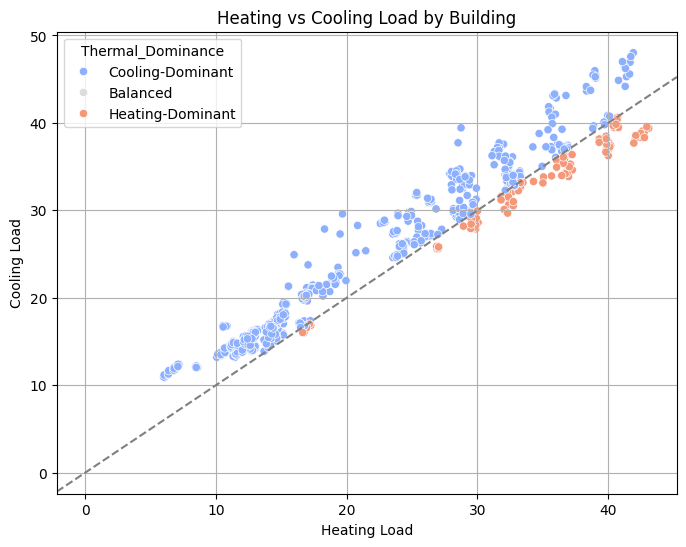

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Heating Load', y='Cooling Load', hue='Thermal_Dominance', palette='coolwarm')
plt.axline((0, 0), slope=1, color='gray', linestyle='--')  # Diagonal = balanced
plt.title("Heating vs Cooling Load by Building")
plt.xlabel("Heating Load")
plt.ylabel("Cooling Load")
plt.grid(True)
plt.show()

### Conclusion:
- There are building with more **Cooling Load**
- Identified **cold-climate** biased buildings using visualization library.
- Tagged and **visualized balanced** vs **imbalanced buildings**.
- Check whether the buildings are more imbalanced Climate, but got unexpected result.
    - Most of building are in Moderate range of climate

## 2. Design Efficiency Indicators
- How does Relative Compactness impact Heating/Cooling Load?

- Is a higher Wall Area or Roof Area increasing energy consumption?

- What's the impact of Overall Height on energy load?



### How does Relative Compactness impact Heating/Cooling Load?

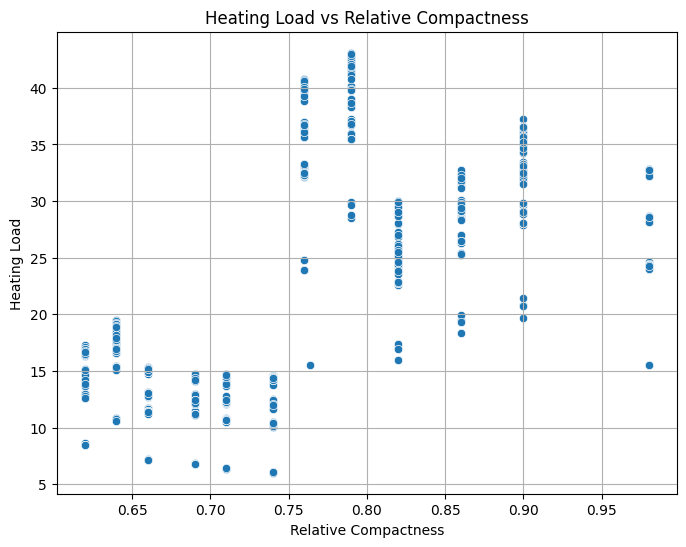

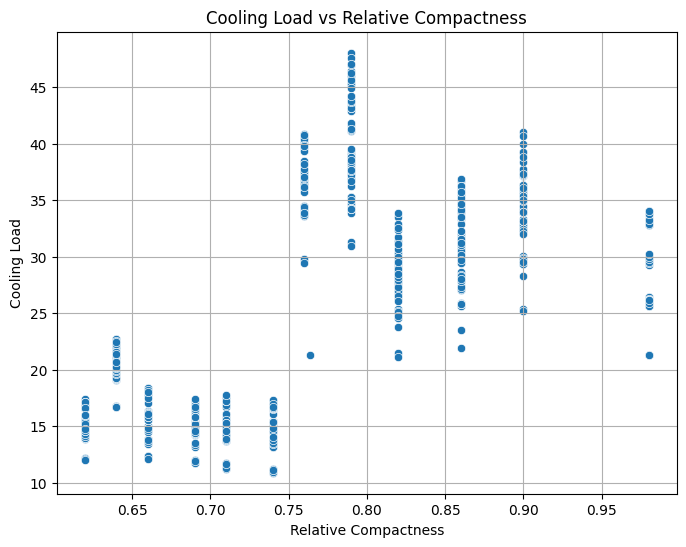

In [17]:
# Heating Load vs Relative Compactness
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Relative Compactness', y='Heating Load')
plt.title("Heating Load vs Relative Compactness")
plt.grid(True)
plt.show()

# Cooling Load vs Relative Compactness
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Relative Compactness', y='Cooling Load')
plt.title("Cooling Load vs Relative Compactness")
plt.grid(True)
plt.show()

In [18]:
heating_corr = df['Relative Compactness'].corr(df['Heating Load'])
cooling_corr = df['Relative Compactness'].corr(df['Cooling Load'])

print(f"Correlation with Heating Load: {heating_corr:.3f}")
print(f"Correlation with Cooling Load: {cooling_corr:.3f}")

Correlation with Heating Load: 0.626
Correlation with Cooling Load: 0.637


- A **positive correlation** suggests that as compactness **increases**, energy load is **increasing**.

Text(0.5, 1.0, 'Cooling Load vs Relative Compactness (with Trendline)')

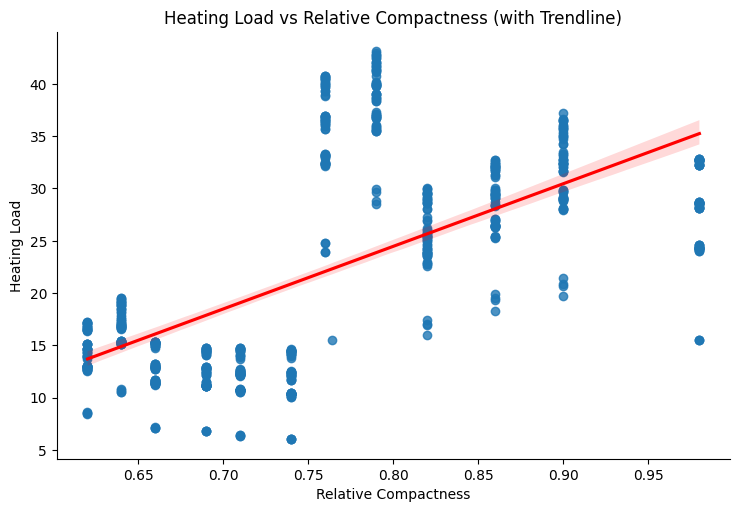

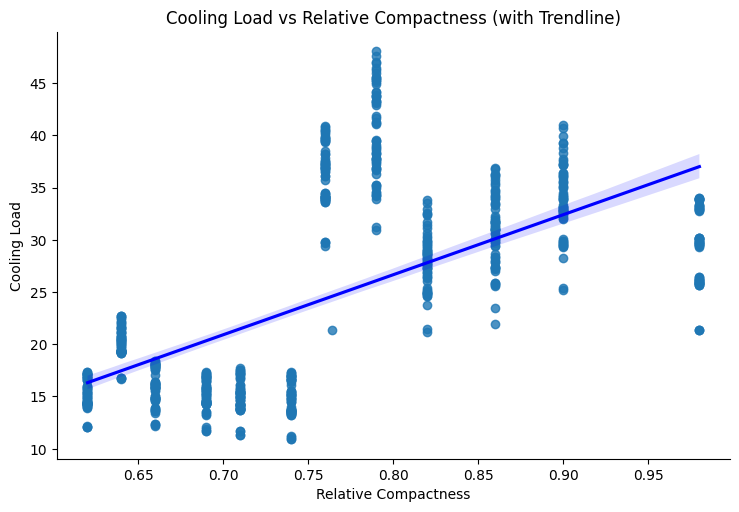

In [20]:
sns.lmplot(data=df, x='Relative Compactness', y='Heating Load', aspect=1.5, line_kws={'color': 'red'})
plt.title("Heating Load vs Relative Compactness (with Trendline)")

sns.lmplot(data=df, x='Relative Compactness', y='Cooling Load', aspect=1.5, line_kws={'color': 'blue'})
plt.title("Cooling Load vs Relative Compactness (with Trendline)")


### Correlation Results:
- **Correlation with Heating Load:** +0.626

- **Correlation with Cooling Load:** +0.637

### What This Means:
🔹 1. **Moderate to Strong Positive Correlation**
A correlation around **+0.63** suggests a **moderate to strong linear relationship.**

🔹 2. As **Relative Compactness increases**, both **Heating Load** and **Cooling Load also increase.**

## ✅ Suggested Conclusion:
"In this dataset, **Relative Compactness** has a **positive correlation** with both Heating and Cooling Load, suggesting that as compactness increases, energy demand also increases. This is counter to typical expectations and suggests that compactness in this context may be defined inversely (i.e., higher RC = less compact), or that other confounding variables (e.g., surface area, glazing, height) are influencing the results."



### Correlation between Relative Compactness and Surface Area


In [25]:
rc_surface_corr = df['Relative Compactness'].corr(df['Surface Area'])
print(f"Correlation between Relative Compactness and Surface Area: {rc_surface_corr:.3f}")

Correlation between Relative Compactness and Surface Area: -0.990


### ✅ Correlation between Relative Compactness and Surface Area = -0.990

This is a **very strong negative correlation**, which confirms:

> 🔍 As Relative Compactness increases, Surface Area decreases.

## So What Does This Mean?

So:

- **Higher Relative Compactness → More compact building → Lower actual surface area**

- **Lower Relative Compactness → Less compact, inefficient shape → Higher surface area**

## 🔍 But Now Let’s Revisit Your Earlier Observation:

***You observed:***

Correlation of **Relative Compactness** with **Heating Load = +0.626**

Correlation with **Cooling Load = +0.637**

### 😕 That seems counterintuitive, right?
Because:

- **Higher RC (more compact) should logically → Lower Heating & Cooling Loads**



**✅ Recommended Conclusion:**

> **Although Relative Compactness is negatively correlated with Surface Area (as expected), it is positively correlated with Heating and Cooling Loads. This suggests that other building features (e.g., glazing, height, or orientation) are confounding this relationship. A multiple regression or controlled analysis is required to isolate the true effect of compactness.**

In [26]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Thermal_Dominance,Imbalanced_Type
0,0.7638,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,Cooling-Dominant,Moderate
1,0.9800,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,Cooling-Dominant,Moderate
2,0.9800,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,Cooling-Dominant,Moderate
3,0.9800,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,Cooling-Dominant,Moderate
4,0.9000,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,Cooling-Dominant,Moderate


## 2.	Analyzing Glazing Area's effect?

In [28]:
df["Glazing Area"].value_counts()

Glazing Area
0.10    240
0.25    240
0.40    240
0.00     48
Name: count, dtype: int64

#### ▶ 1. Visualize Relationship with Heating and Cooling Load


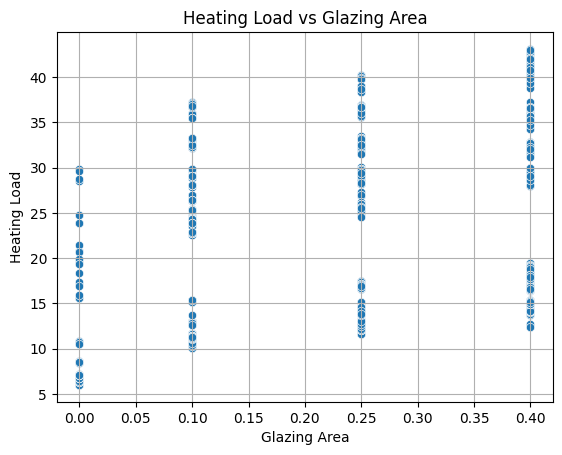

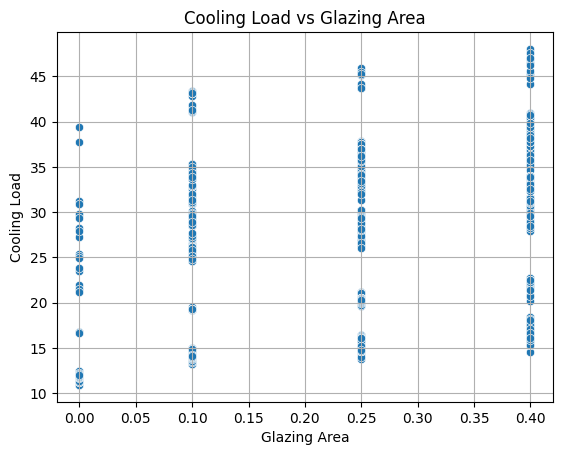

In [29]:
# Heating Load vs Glazing Area
sns.scatterplot(data=df, x='Glazing Area', y='Heating Load')
plt.title("Heating Load vs Glazing Area")
plt.grid(True)
plt.show()

# Cooling Load vs Glazing Area
sns.scatterplot(data=df, x='Glazing Area', y='Cooling Load')
plt.title("Cooling Load vs Glazing Area")
plt.grid(True)
plt.show()


In [30]:
hl_corr = df['Glazing Area'].corr(df['Heating Load'])
cl_corr = df['Glazing Area'].corr(df['Cooling Load'])

print(f"Correlation with Heating Load: {hl_corr:.3f}")
print(f"Correlation with Cooling Load: {cl_corr:.3f}")

Correlation with Heating Load: 0.270
Correlation with Cooling Load: 0.208


In [31]:
df.groupby('Glazing Area')[['Heating Load', 'Cooling Load']].mean()

,Heating Load,Cooling Load
Glazing Area,,
0.00,14.286458,19.706250
0.10,20.357167,22.935542
0.25,22.756917,24.892625
0.40,25.411667,26.911417


In [34]:
df.groupby('Glazing Area Distribution')[['Heating Load', 'Cooling Load']].mean()

,Heating Load,Cooling Load
Glazing Area Distribution,,
0,14.286458,19.706250
1,23.026111,25.179514
2,22.934444,24.996875
3,22.681458,24.659444
4,22.886667,25.015139
5,22.680903,24.715000


In [35]:
df['Glazing Area Distribution'].value_counts()

Glazing Area Distribution
1    144
2    144
4    144
3    144
5    144
0     48
Name: count, dtype: int64

Text(0.5, 1.0, 'Heating Load Distribution by Glazing Area')

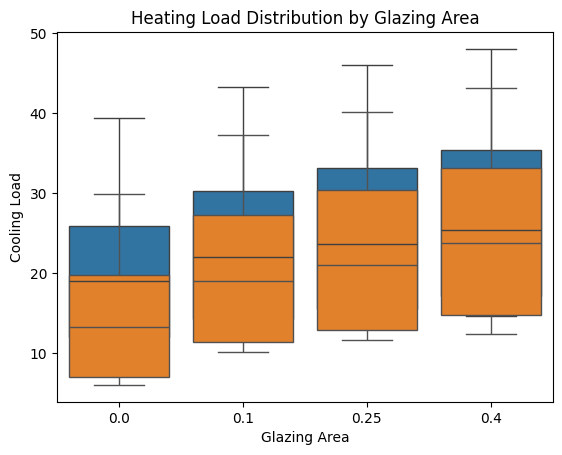

In [38]:
sns.boxplot(data=df, x='Glazing Area', y='Cooling Load')
plt.title("Cooling Load Distribution by Glazing Area")

sns.boxplot(data=df, x='Glazing Area', y='Heating Load')
plt.title("Heating Load Distribution by Glazing Area")

Text(0.5, 1.0, 'Heating Load Distribution by Glazing Area')

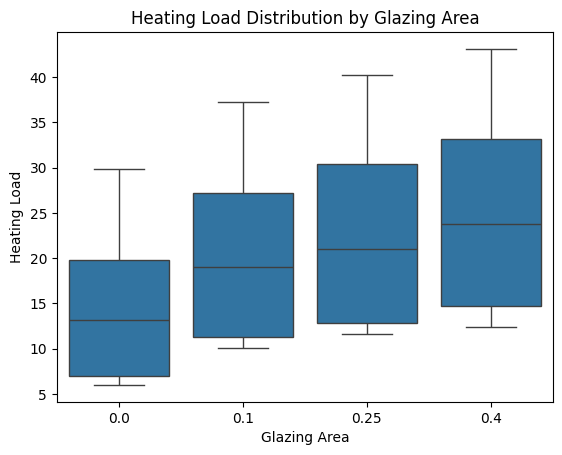

In [39]:
sns.boxplot(data=df, x='Glazing Area', y='Heating Load')
plt.title("Heating Load Distribution by Glazing Area")

Text(0.5, 1.0, 'Cooling Load Distribution by Glazing Area')

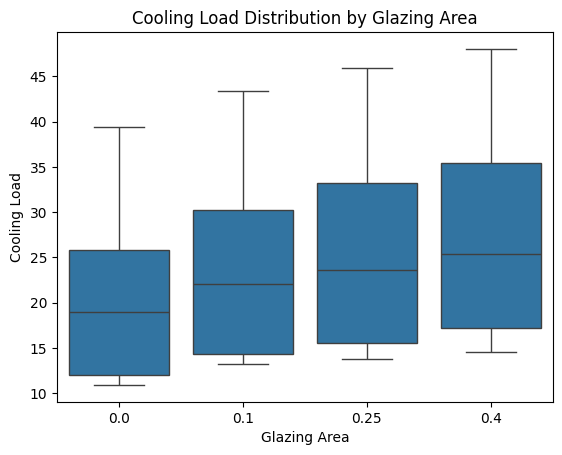

In [37]:
sns.boxplot(data=df, x='Glazing Area', y='Cooling Load')
plt.title("Cooling Load Distribution by Glazing Area")

### ✅ Interpretation:

#### 🔹 1. Weak Positive Correlation
- Both values are **low positive correlations** (between 0.2 and 0.3).

- This means **Glazing Area has only a modest impact** on both **Heating Load** and **Cooling Load**.

## 🔸 Heating Load (0.270):
- A slight increase in Heating Load with more glazing.

- This is slightly surprising — glazing can reduce heating needs due to passive solar heat gain, but:

- If the building loses more heat through windows (poor insulation), heating needs rise.

- This might be what’s reflected here.

## 🔸 Cooling Load (0.208):
- As expected, cooling load increases with more glazing, because:

- Larger windows allow more solar heat to enter during summer.

- That increases demand for air conditioning.

### ✅ Suggested Conclusion:
> Glazing Area shows a weak but positive correlation with both heating and cooling loads. This suggests that while more glazing tends to increase energy demands—especially for cooling—the overall effect is modest. A deeper analysis including window orientation and quality would give more actionable insights.



In [33]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Thermal_Dominance,Imbalanced_Type
0,0.7638,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,Cooling-Dominant,Moderate
1,0.9800,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,Cooling-Dominant,Moderate
2,0.9800,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,Cooling-Dominant,Moderate
3,0.9800,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,Cooling-Dominant,Moderate
4,0.9000,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,Cooling-Dominant,Moderate


In [40]:
print("Wall Area correlation with Heating Load:", df['Wall Area'].corr(df['Heating Load']).round(3))
print("Wall Area correlation with Cooling Load:", df['Wall Area'].corr(df['Cooling Load']).round(3))

print("Roof Area correlation with Heating Load:", df['Roof Area'].corr(df['Heating Load']).round(3))
print("Roof Area correlation with Cooling Load:", df['Roof Area'].corr(df['Cooling Load']).round(3))

Wall Area correlation with Heating Load: 0.456
Wall Area correlation with Cooling Load: 0.427
Roof Area correlation with Heating Load: -0.862
Roof Area correlation with Cooling Load: -0.863


##  Insight-by-Insight Breakdown

### 1. Wall Area → Higher Loads (Positive Correlation)

- **Interpretation:** More wall surface → more external exposure → more heat loss in winter and gain in summer.
- **Implication:** Design strategies should **optimize wall insulation or reduce unnecessary wall exposure.**

### 2. Roof Area → Lower Loads (Strong Negative Correlation)

This is the most surprising finding, because one might expect:
- Larger roof → more solar gain → higher cooling load.

However, our data shows the **opposite:**
- **Larger roof area = lower heating and cooling loads**

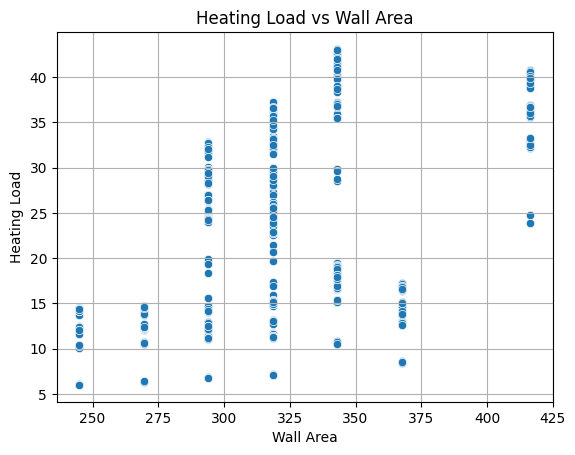

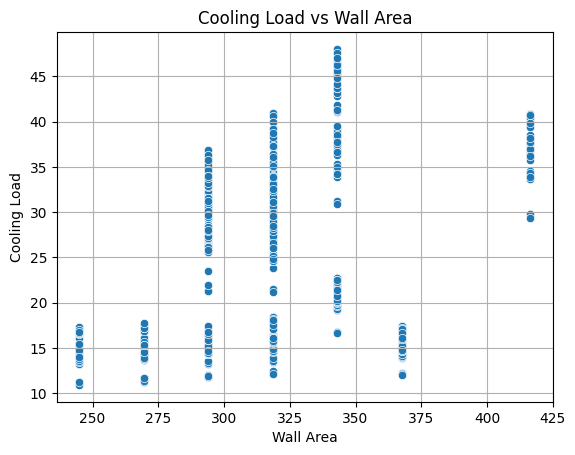

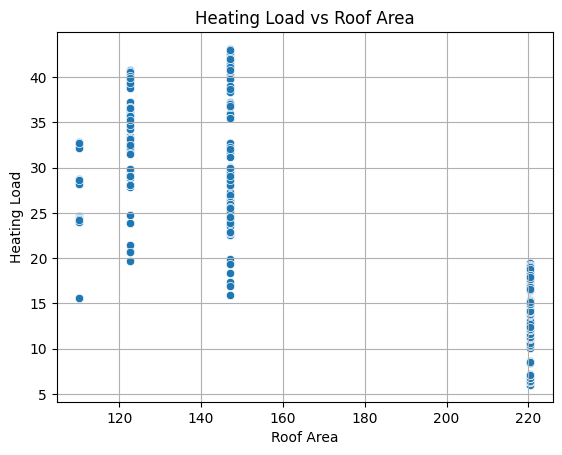

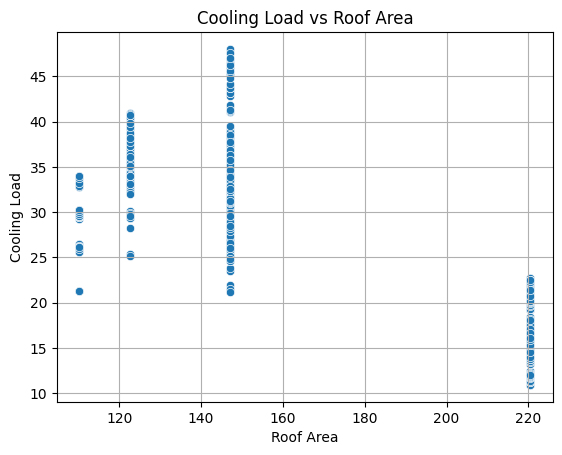

In [41]:
# Wall Area
sns.scatterplot(data=df, x='Wall Area', y='Heating Load')
plt.title("Heating Load vs Wall Area")
plt.grid(True)
plt.show()

sns.scatterplot(data=df, x='Wall Area', y='Cooling Load')
plt.title("Cooling Load vs Wall Area")
plt.grid(True)
plt.show()

# Roof Area
sns.scatterplot(data=df, x='Roof Area', y='Heating Load')
plt.title("Heating Load vs Roof Area")
plt.grid(True)
plt.show()

sns.scatterplot(data=df, x='Roof Area', y='Cooling Load')
plt.title("Cooling Load vs Roof Area")
plt.grid(True)
plt.show()

In [42]:
df['Wall_Area_Group'] = pd.cut(df['Wall Area'], bins=4)
df.groupby('Wall_Area_Group')[['Heating Load', 'Cooling Load']].mean()

C:\Users\admin\AppData\Local\Temp\ipykernel_11464\462713485.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Wall_Area_Group')[['Heating Load', 'Cooling Load']].mean()


,Heating Load,Cooling Load
Wall_Area_Group,,
"(244.828, 287.875]",11.963437,14.922656
"(287.875, 330.75]",23.098125,25.515000
"(330.75, 373.625]",23.168854,25.236875
"(373.625, 416.5]",35.664219,36.407187


## 📌 Suggested Conclusion
> "Wall Area moderately increases both Heating and Cooling Load, confirming its role in thermal loss/gain. Surprisingly, Roof Area shows a strong negative correlation with both, suggesting that designs with **larger roofs may be more thermally efficient** — possibly due to better insulation or interaction with overall building shape. This highlights the importance of optimizing both **building form and envelope materials** to enhance energy efficiency."

### Covariance Analysis

> We’ll analyze how building features like Roof Area, Wall Area, Overall Height vary with energy loads (Heating Load, Cooling Load).

In [43]:
# Select relevant features
features = ['Wall Area', 'Roof Area', 'Overall Height', 
            'Glazing Area', 'Heating Load', 'Cooling Load']

# Compute covariance matrix
cov_matrix = df[features].cov()
cov_matrix.round(2)

,Wall Area,Roof Area,Overall Height,Glazing Area,Heating Load,Cooling Load
Wall Area,1903.27,-575.99,21.47,0.00,200.59,177.27
Roof Area,-575.99,2039.96,-76.92,-0.00,-392.76,-370.62
Overall Height,21.47,-76.92,3.07,0.00,15.72,14.92
Glazing Area,0.00,-0.00,0.00,0.02,0.36,0.26
Heating Load,200.59,-392.76,15.72,0.36,101.81,93.67
Cooling Load,177.27,-370.62,14.92,0.26,93.67,90.50


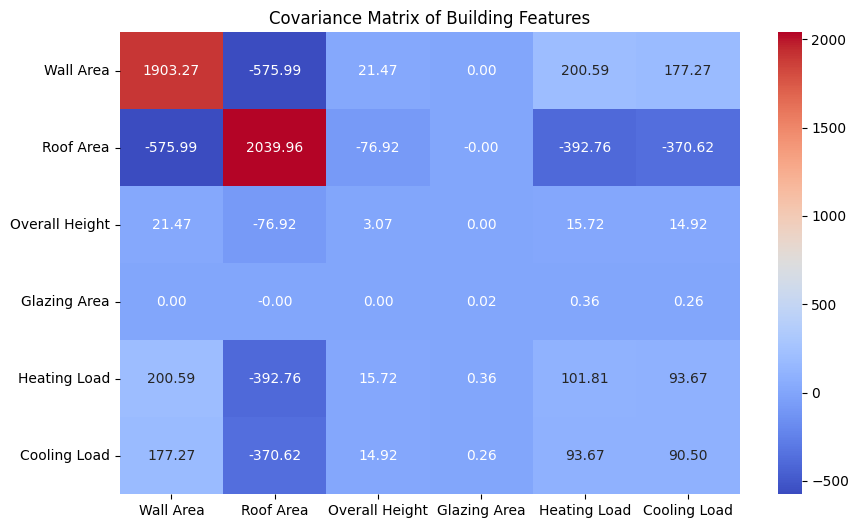

In [44]:
plt.figure(figsize=(10, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Covariance Matrix of Building Features")
plt.show()

### ✅ Interpretation:

> As **Roof Area increases, both Heating Load and Cooling Load decrease** — with a **strong negative trend.**

This aligns perfectly with your earlier correlation results where:

- corr(Roof Area, Cooling Load) ≈ –0.86
- corr(Roof Area, Heating Load) ≈ –0.86

### 📌 What Does “Least Covariance” Mean Here?

- It's not bad — it simply means:
    - There’s a **strong inverse linear relationship** (as one goes up, the other comes down).
    - And because Roof Area is **large in value range** (e.g., 100–300 m²), its covariance with energy loads is **high in magnitude**.

But since it's negative, we say it has the “least” (lowest) covariance numerically.

### 🔸 Wall Area:

> As wall area increases, heating and cooling loads also increase.
> This makes sense — more wall exposure means:

- More heat **loss** in winter → higher **heating** demand.
- More heat **gain** in summer → higher **cooling** demand.

It’s a **direct driver of thermal load.**

## 🔧 Quick Conclusion:

> **"Wall Area** is a driver of increased energy loads, while **Roof Area** has a suppressing effect. Architectural focus should be on minimizing external wall exposure or improving wall insulation to reduce HVAC loads."